In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from skimage import io
import tensorflow as tf
import matplotlib.patches as mpatches
#import skimage.measure as measure
import skimage.metrics as measure
import math
import cv2

# Denoising in MNIST digit dataset using PCA
TBD

In [62]:
###
# Method takes original image, and add noise to it and do pca analysis
###
def pca_simple_denoising(original):
    np.random.seed(42)
    x,y,c = original.shape
    sigma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    psnr1 = []
    psnr2 = []
    for s in sigma:
      noisy = np.random.normal(original.data, s)
      plt.imshow(noisy)
      X =  noisy.reshape(-1, 3)
      #print(X.shape)
      pca = PCA(0.5).fit(X)
      pca.n_components_
      components = pca.fit_transform(X)
      filtered = pca.inverse_transform(components)
      denoised = filtered.reshape(x,y,c)
      fig = plt.figure(figsize=(5,5))
      plt.imshow(denoised)
      psnr1.append(psnr(original,noisy))
      psnr2.append(psnr(original,denoised))
    return psnr1,psnr2,sigma


###
# Method takes original and noisy and does PCA analysis
###
def pca_simple_denoising_dataset(original,noisy):
    np.random.seed(42)
    x,y,c = noisy.shape
    X =  noisy.reshape(-1, 3)
    pca = PCA(0.5).fit(X)
    pca.n_components_
    components = pca.fit_transform(X)
    filtered = pca.inverse_transform(components)
    denoised = filtered.reshape(x,y,c)
#     fig = plt.figure(figsize=(5,5))
#     plt.imshow(denoised)
    psnr1 = measure.peak_signal_noise_ratio(original,noisy)
    psnr2 = measure.peak_signal_noise_ratio(original,denoised)
    return psnr1,psnr2,denoised


###
# Should be used along with pca_simple_denoising method
###
def plot_graphs_all_sigma(psnr1,psnr2,sigma): 
    plt.plot(sigma, psnr1 , 'ro-', linewidth=2)
    plt.plot(sigma, psnr2, 'bs-', linewidth =2)
    plt.title('PSNR values for Image dataset')
    plt.xlabel('Sigma Values')
    plt.ylabel('PSNR Values')
    leg = plt.legend(['psnr original/noisy'], loc='best', borderpad=0.3, 
                     shadow=False,
                     markerscale=0.4)
    leg.get_frame().set_alpha(0.4)
    red_patch = mpatches.Patch(color='red', label='PSNR original-noisy')
    plt.legend(handles=[red_patch])
    blue_patch = mpatches.Patch(color='blue', label='PSNR original-denoised')
    plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


###
# Should be used with pca_simple_denoising_dataset
###
def plot_graphs_all_images(psnr1,psnr2):  
    plt.plot([i for i in range(len(psnr1))], psnr1 , 'ro-', linewidth=2)
    plt.plot([i for i in range(len(psnr1))], psnr2, 'bs-', linewidth =2)
    plt.title('PSNR values for Image dataset')
    plt.xlabel('Image number')
    plt.ylabel('PSNR Values')
    leg = plt.legend(['psnr original/noisy'], loc='best', borderpad=0.3, 
                     shadow=False,
                     markerscale=0.4)
    leg.get_frame().set_alpha(0.4)
    #legend('sin(x/2)','2016')
    red_patch = mpatches.Patch(color='red', label='PSNR original-noisy')
    plt.legend(handles=[red_patch])
    blue_patch = mpatches.Patch(color='blue', label='PSNR original-denoised')
    plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #plt.plot(sigma, psnr2, 'blue', linewidth =2)
    plt.show()


# PCA analysis with single image

(-0.5, 480.5, 320.5, -0.5)

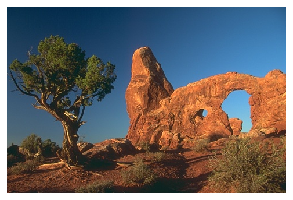

In [66]:
# plot original image
original = plt.imread("original_png/0058.png")
fig = plt.figure(figsize=(5,5))
plt.imshow(original)
plt.grid(False)
plt.axis('off')

(321, 481, 3)

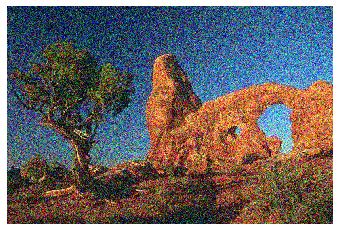

In [67]:
# plot noisy image
noisy = plt.imread("noisy50/0058.png")
plt.imshow(noisy)
plt.grid(False)
plt.axis('off')
noisy.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14.986096250829974 16.737364326373925


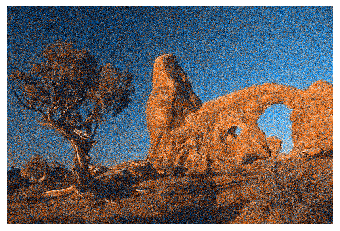

In [68]:
# DO PCA analysis for the noisy image
psnr1,psnr2,denoised = pca_simple_denoising_dataset(original,noisy)
plt.imshow(denoised)
plt.grid(False)
plt.axis('off')
print(psnr1,psnr2)

# PCA analysis in whole dataset

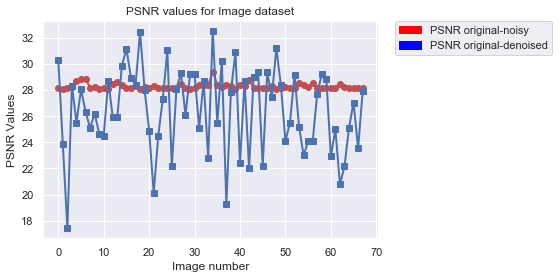

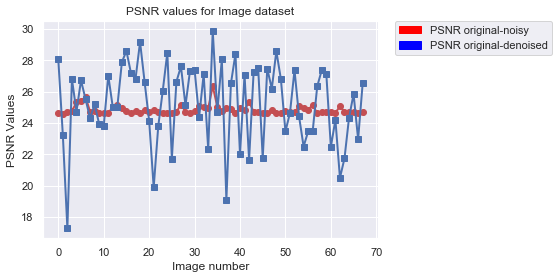

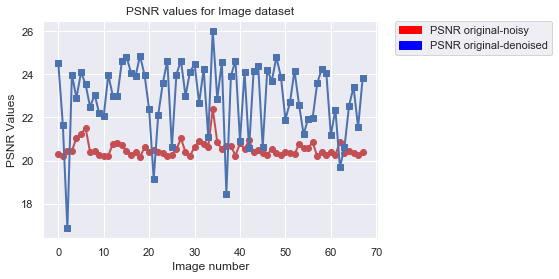

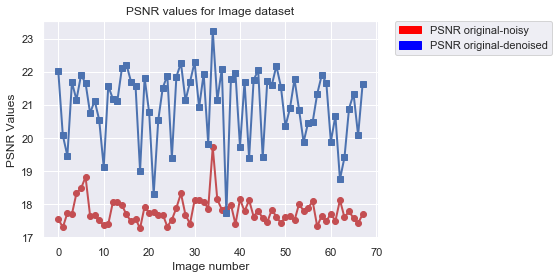

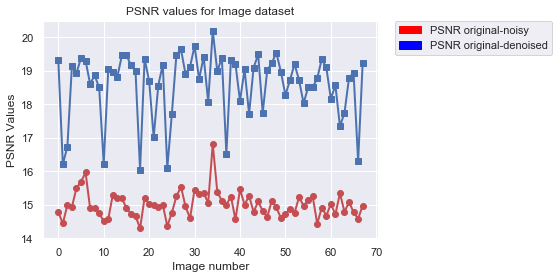

In [56]:
import glob
sigma = [10,15,25,35,50]
for s in sigma:
    filenames_noisy = [img for img in glob.glob("noisy"+ str(s) +"/*.png")]
    filenames_original = [img for img in glob.glob("original_png/*.png")]
    images = []
    p1 = []
    p2 = []
    i,j=0,0
    denoised_images = []
    while i<len(filenames_noisy) and j<len(filenames_original):
        original = plt.imread(filenames_original[j])
        noisy= plt.imread(filenames_noisy[i])
        psnr1,psnr2,denoised = pca_simple_denoising_dataset(original,noisy)
        #print(filenames_original[i],filenames_noisy[j],psnr1,psnr2)
        p1.append(psnr1)
        p2.append(psnr2)
        denoised_images.append(denoised)
        i+=1
        j+=1
    plot_graphs_all_images(p1,p2)

## PCA Image Denoising

Principal component analysis is a orthogonal transformation which seeks the direction of maximum variance in the data and commonly used in dimensionality reduction of the data. Data with maximum variance is contains most of the data needed to present the whole dataset. In image denoising one has to take care of the compromise between noisy data and preserving the high variance image data detail. We can start by looking into the plain PCA analysis to see how PCA inherently tries to reduce the noise in an image.

The basic intuition behind denoising the image is that any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise. This is the very basic idea behind how a PCA simply can reduce noise from the image. Though this is not an efficient approach(we will look at better approach through modified PCA in next section), we can look how a plain vanilla PCA can improve the PSNR(peak signal to noise ration) over an image.
We tried the plain vanilla PCA method in the mnist digit data set, an then in the RGB images. 

The approach for PCA in MNIST digit dataset:



